<a href="https://colab.research.google.com/github/EteimZ/Deep_Learning-Notebooks/blob/main/TensorFlow/training_loop_in_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Training loop in Tensorflow

In [1]:
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

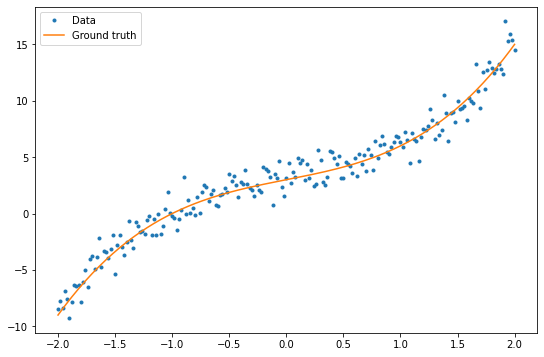

In [2]:
x = tf.linspace(-2, 2, 201) # set up x values
x = tf.cast(x, tf.float32) # convert to float

# Create function
def f(x):
  y = x**3 + 2*x + 3
  return y

y = f(x) + tf.random.normal(shape=[201]) # add noise to function

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();


In [3]:
# Create ML model

class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[4], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_c = tf.Variable(rand_init[0])
    self.w_q = tf.Variable(rand_init[1])
    self.w_l = tf.Variable(rand_init[2])
    self.b = tf.Variable(rand_init[3])
  
  @tf.function
  def __call__(self, x):
    # Cubic Model : cubic_weight * x^3 + quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_c * (x**3) + self.w_q * (x**2) + self.w_l * x + self.b

In [4]:
cubic_model = Model()

In [5]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()


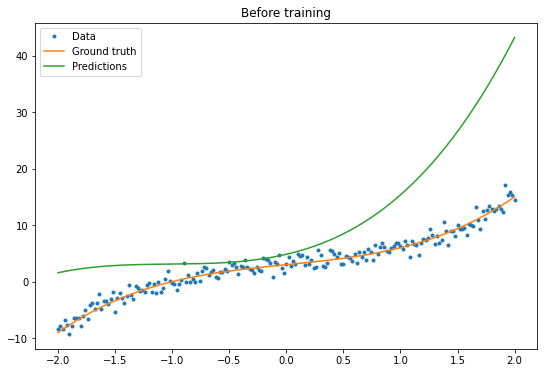

In [6]:
# check model's performance before training
plot_preds(x, y, f, cubic_model, 'Before training')

In [7]:
# define a loss function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [8]:
# create dataset

batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 27.472
Mean squared error for step 10: 1.642
Mean squared error for step 20: 1.391
Mean squared error for step 30: 1.219
Mean squared error for step 40: 1.124
Mean squared error for step 50: 1.061
Mean squared error for step 60: 1.064
Mean squared error for step 70: 1.019
Mean squared error for step 80: 1.001
Mean squared error for step 90: 0.999




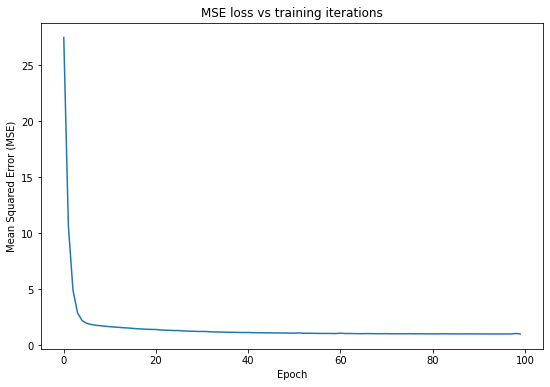

In [9]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(cubic_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, cubic_model.variables)
    for g,v in zip(grads, cubic_model.variables):
        v.assign_sub(learning_rate*g)

  # Keep track of model loss per epoch
  loss = mse_loss(cubic_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

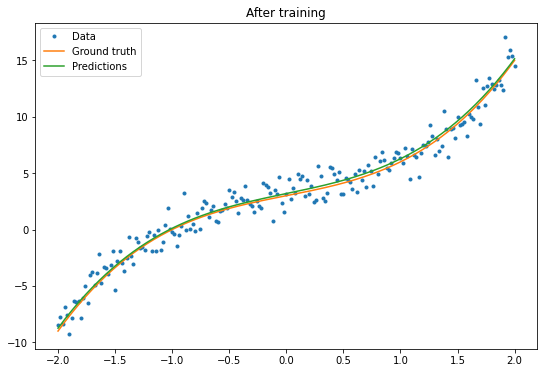

In [10]:
# model's performace after training
plot_preds(x, y, f, cubic_model, 'After training')